In [1]:
import numpy as np
import matplotlib.pyplot as plt

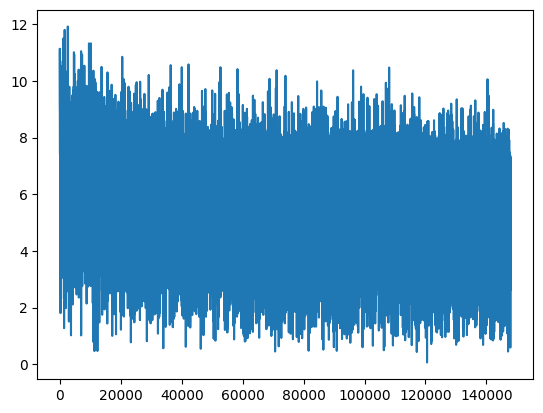

In [2]:
loss = np.load('losses.npy')
plt.plot(loss)
plt.show()

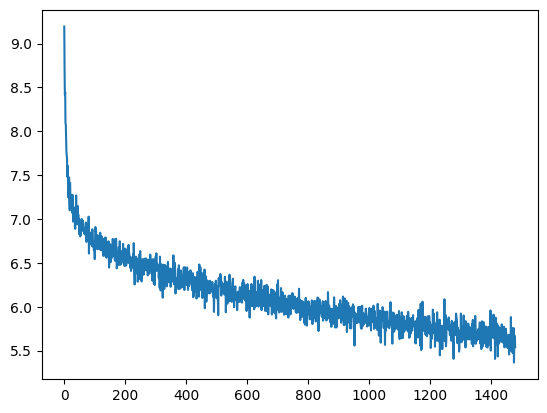

In [3]:
avg_every_100_loss = [np.mean(loss[i:i+100]) for i in range(0,len(loss), 100)]
plt.plot(avg_every_100_loss)
plt.show()

In [1]:
from mingpt.model import GPT
from mingpt.trainer import Trainer 
import torch

In [10]:
from mingpt.utils import CfgNode # not sure if this is necessary
torch.serialization.add_safe_globals([CfgNode])

In [2]:
checkpoint = torch.load('checkpoint_20.pth', weights_only=False, map_location=torch.device('cpu'))

In [3]:
model = GPT(checkpoint['model_config'])

number of parameters: 774.16M


In [4]:
model.load_state_dict(checkpoint['model_state_dict'])

<All keys matched successfully>

In [5]:
optimizer = model.configure_optimizers(checkpoint['trainer_config'])
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])